In [6]:
library(stringr)
library(ggplot2)
library(RColorBrewer)
library(reshape2)
library(tibble)
library(dplyr)
library(ggpubr)
inputfolder = "../data/"
slib = "validationDS" #all except this

theme_set(theme_minimal())
theme_update(text = element_text(size = 17))

options(repr.matrix.max.rows=14, repr.matrix.max.cols=20)

In [7]:
anno_pep = read.table("DolphynLa_001_Universal.tsv", header = TRUE, sep = "\t", row.names = 2)
anno_pep = anno_pep[!anno_pep$sublibrary == slib,]

Warning message in file(file, "rt"):
“cannot open file 'DolphynLa_001_Universal.tsv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [16]:
files <- list.files(inputfolder, pattern = "\\_DolphynLa_001_Hits_foldchange.tsv$",  recursive = TRUE)
hfc <-  read.table(paste0(inputfolder,files[1]), header=TRUE, row.names = 1)
for (f in files[-1]) hfc <- cbind(hfc, read.table(paste0(inputfolder,f), header=TRUE, row.names = 1))  
hfc = hfc[,!grepl("BEADS_ONLY", colnames(hfc))]
lhfc = log(hfc)

In [11]:
restrictionSitePeps = read.table("restrictionSidePeptides.txt")$V1
anno_pep$containsResSite = FALSE
anno_pep[anno_pep$tile_id %in% restrictionSitePeps,"containsResSite"] = TRUE

In [9]:
anno_samples = data.frame(org = colnames(lhfc))
anno_samples = cbind(anno_samples, str_split_fixed(anno_samples$org, "\\.",4))

anno_samples$sampleID = anno_samples$`4`
anno_samples$sampleID = gsub("Pre.Therapy_.", "", anno_samples$sampleID)
anno_samples$sampleID = gsub(".20A20G.1", "", anno_samples$sampleID)
anno_samples$sampleID = gsub(".20A20G", "", anno_samples$sampleID)
anno_samples$sampleID = gsub(".Pierce_IgA.1", "", anno_samples$sampleID)
anno_samples$sampleID = gsub(".PierceIgA.2", "", anno_samples$sampleID)
anno_samples$sampleID = gsub("VRC.", "", anno_samples$sampleID)
anno_samples$sampleID = gsub("IBD.Control.", "", anno_samples$sampleID)
anno_samples$sampleID = gsub("_", "", anno_samples$sampleID)
rownames(anno_samples) = paste0(anno_samples$sampleID,anno_samples$`1`)
colnames(anno_samples) = c("original", "plate", "dataset", "group", "description", "sampleID")
colnames(lhfc) = rownames(anno_samples)

In [17]:
anno_samples = data.frame(org = colnames(lhfc))
anno_samples = cbind(anno_samples, str_split_fixed(anno_samples$org, "\\.",4))
anno_samples$sampleID = anno_samples$`4`
rownames(anno_samples) = paste0(anno_samples$sampleID,anno_samples$`1`)
colnames(anno_samples) = c("original", "plate", "dataset", "group", "description", "sampleID")

In [18]:
anno_samples %>% subset(group == "Control") %>% subset(plate %in% c("X194","X195")) %>% rownames()  -> healthySamples
#lhfc %>% select(all_of(healthySamples)) -> lhfc from elsewhere!

In [19]:
healthySamples

[1] "VRC.S3.0078.01.20A20G.1X194" "VRC.S3.0144.01.20A20G.1X194"
 [3] "VRC.S3.0153.01.20A20G.1X194" "VRC.S3.0169.01.20A20G.1X194"
 [5] "VRC.S3.0171.01.20A20G.1X194" "VRC.S3.0195.01.20A20G.1X194"
 [7] "VRC.S3.0495.01.20A20G.1X194" "VRC.S3.0616.01.20A20G.1X194"
 [9] "VRC.S3.0617.01.20A20G.1X194" "VRC.S3.0633.01.20A20G.1X194"
[11] "VRC.S3.0646.01.20A20G.1X194" "VRC.S3.0657.01.20A20G.1X194"
[13] "VRC.S3.0665.01.20A20G.1X194" "VRC.S3.0677.01.20A20G.1X194"
[15] "VRC.S3.0693.01.20A20G.2X194" "VRC.S3.0698.01.20A20G.1X194"
[17] "VRC.S3.0700.01.20A20G.1X194" "VRC.S3.0701.01.20A20G.1X194"
[19] "VRC.S3.0701.01.20A20G.2X194" "VRC.S3.0710.01.20A20G.1X194"
[21] "VRC.S3.0748.01.20A20G.1X194" "VRC.S3.0800.01.20A20G.1X194"
[23] "VRC.S3.0906.01.20A20G.1X194" "VRC.SO.0386.01.20A20G.1X194"
[25] "VRC.SO.0437.01.20A20G.1X194" "VRC.SO.0458.01.20A20G.1X194"
[27] "VRC.SO.0491.01.20A20G.1X194" "VRC.SO.0665.01.20A20G.1X194"
[29] "VRC.SO.0679.02.20A20G.1X194" "VRC.SO.0739.01.20A20G.1X194"
[31] "VRC.SO.0746.01.20A20G.1X194" "VRC.SO.0749.01.20A20G.1X194"
[33] "VRC.SO.0761.01.20A20G.1X194" "VRC.S3.0137.01.20A20G.1X195"
[35] "VRC.S3.0149.01.20A20G.1X195" "VRC.S3.0154.01.20A20G.1X195"
[37] "VRC.S3.0500.01.20A20G.1X195" "VRC.S3.0521.01.20A20G.1X195"
[39] "VRC.S3.0586.01.20A20G.1X195" "VRC.S3.0598.01.20A20G.1X195"
[41] "VRC.S3.0613.01.20A20G.1X195" "VRC.S3.0630.01.20A20G.1X195"
[43] "VRC.S3.0631.01.20A20G.1X195" "VRC.S3.0639.01.20A20G.1X195"
[45] "VRC.S3.0652.01.20A20G.1X195" "VRC.S3.0662.01.20A20G.1X195"
[47] "VRC.S3.0693.01.20A20G.1X195" "VRC.S3.0719.01.20A20G.1X195"
[49] "VRC.S3.0720.01.20A20G.1X195" "VRC.S3.0723.01.20A20G.1X195"
[51] "VRC.S3.0736.01.20A20G.1X195" "VRC.SO.0456.01.20A20G.1X195"
[53] "VRC.SO.0479.01.20A20G.1X195"

In [20]:
anno_samples[healthySamples,] %>% select(dataset) %>% table()

.
Helmsley      VRC 
       0       53 

In [6]:
peps = anno_pep[anno_pep$containsResSite==FALSE ,c("tile_id","pro_id","taxon_id","sublibrary")]
lhfc[rownames(peps),] %>% select(contains("X194") | contains("X195")) %>% rowSums()>0 ->> peptide_fair_groundtruth
peps = cbind(peps,reactive = as.numeric(peptide_fair_groundtruth))
peps = droplevels(peps)

## Question

Do we get a good recall per base probed?

In [8]:
merge(aggregate(tile_id ~ sublibrary + reactive, data = peps, FUN = length), 
      aggregate(tile_id ~ sublibrary, data = peps, FUN = length), 
      by = "sublibrary", all = TRUE) %>% 
rename(total_peptides = tile_id.y) %>% rename(react_peptides = tile_id.x) %>% 
mutate(ratio = react_peptides/total_peptides) ->> evaldf

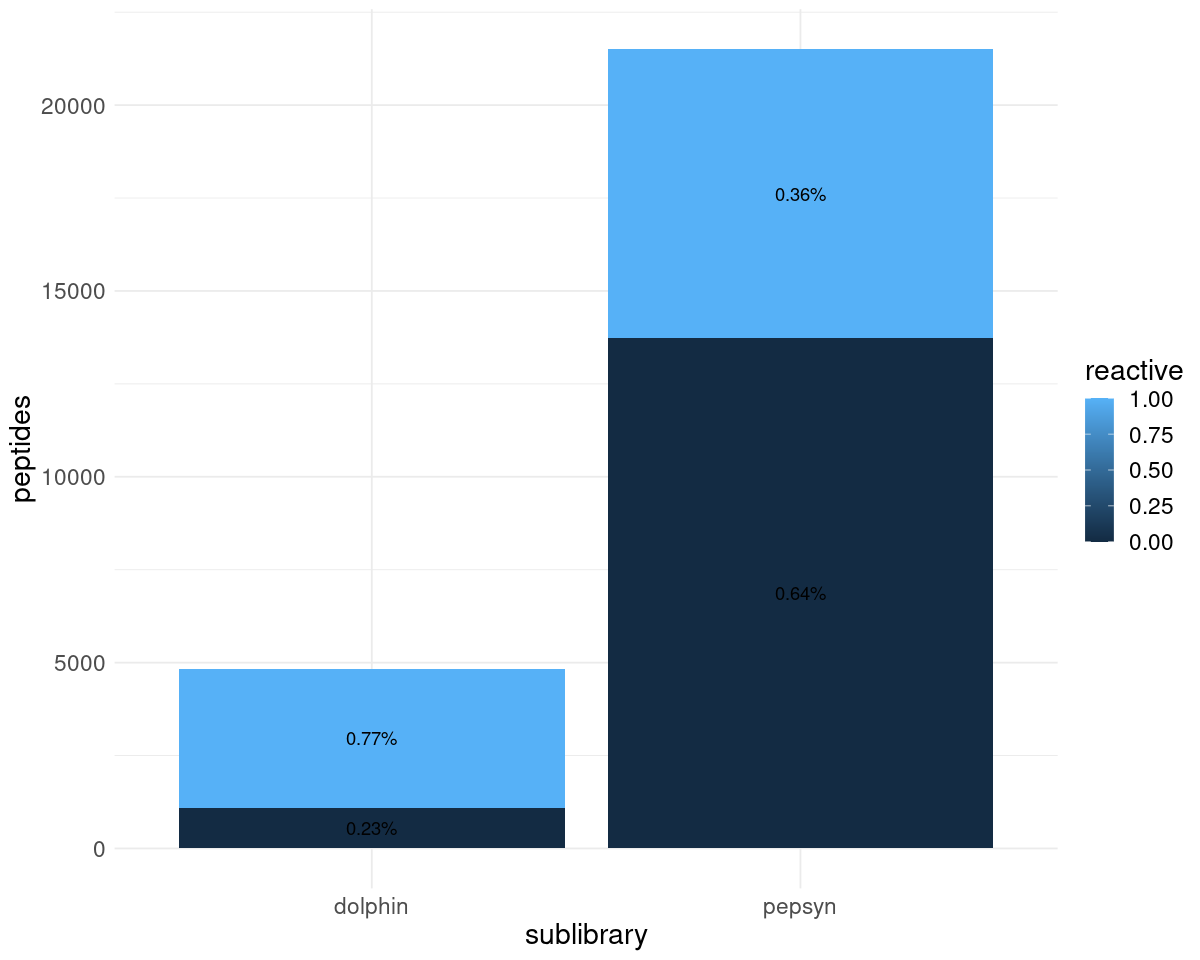

In [9]:
options(repr.plot.width=10, repr.plot.height=8)
evaldf %>% select(-total_peptides) %>% rename(peptides = react_peptides) %>% subset(sublibrary != "dolphinepitopes") %>%
ggplot(aes(fill=reactive, y=peptides, x=sublibrary)) + 
    geom_bar(position=position_stack(reverse = FALSE), stat="identity") +
    geom_text(aes(label=paste0(sprintf("%1.2f", ratio),"%")), position=position_stack(vjust=0.5)) 

null device 
          1

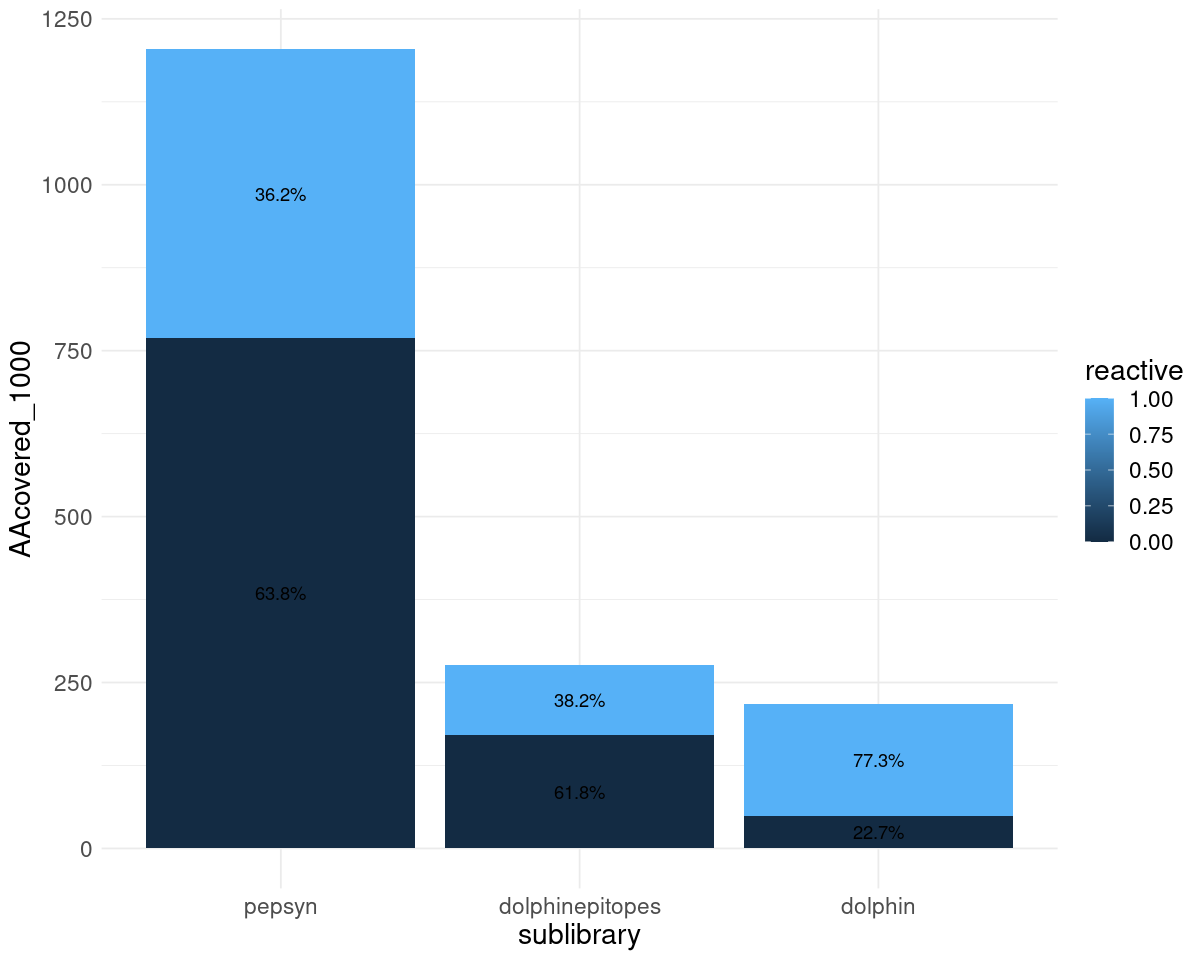

In [10]:
options(repr.plot.width=10, repr.plot.height=8)
#pdf("figures/sublibraries_percNcoverage.pdf", height = 8, width = 10)
evaldf %>% merge(data.frame(sublibrary=c("pepsyn", "dolphinepitopes", "dolphin"),length=c(56,15,45)), by="sublibrary", all = TRUE) %>%
mutate(AAcovered_1000 = react_peptides * length / 1000)  %>% 
select(-total_peptides) %>% rename(peptides = react_peptides) %>%
mutate(sublibrary = factor(sublibrary, levels = c("pepsyn", "dolphinepitopes", "dolphin"))) %>%
ggplot(aes(fill=reactive, y=AAcovered_1000, x=sublibrary)) + 
    geom_bar(position=position_stack(reverse = FALSE), stat="identity") +
    geom_text(aes(label=paste0(sprintf("%1.1f", 100 * ratio),"%")), position=position_stack(vjust=0.5)) 
dev.off()

## Question

Whats the recall/discovery power per protein/phage?

In [11]:
options(repr.plot.width=10, repr.plot.height=8)

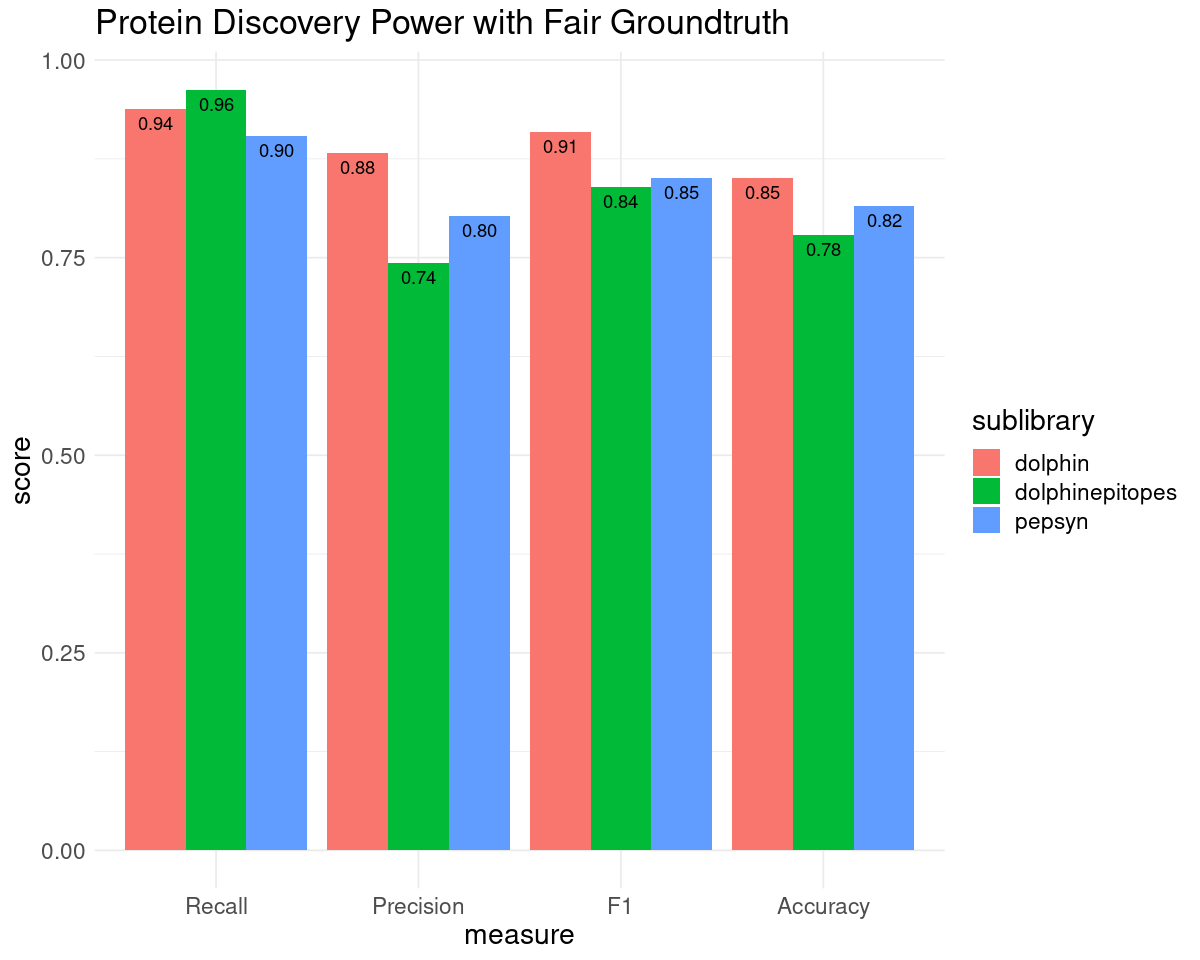

In [12]:
peps %>% aggregate(reactive ~ pro_id, data = ., FUN = sum) %>% mutate(protein_grountruth = as.numeric(reactive > 2)) %>% select(-reactive) ->> protein_truth
peps %>% aggregate(reactive ~ pro_id + sublibrary, data = ., FUN = max) %>% merge(protein_truth, by = "pro_id") ->> protein_df

protein_df %>% subset(protein_grountruth == 1) %>% select(sublibrary, reactive) %>% 
table() %>% as.data.frame() %>% dcast(sublibrary ~ reactive, value.var = "Freq") %>% rename(FN="0",TP="1") %>%
mutate(Recall = TP/(TP+FN)) ->> recall_df

protein_df %>% subset(reactive == 1) %>% select(sublibrary, protein_grountruth) %>% 
table() %>% as.data.frame() %>% dcast(sublibrary ~ protein_grountruth, value.var = "Freq") %>% rename(FP="0",TP="1") %>%
mutate(Precision = TP/(TP+FP)) ->> prec_df

protein_df %>% subset(reactive == 0) %>% subset(protein_grountruth == 0)  %>% select(sublibrary) %>% 
table() %>% as.data.frame() %>% rename(sublibrary=".",TN="Freq") ->> tn_df

merge(recall_df,prec_df) %>% merge(tn_df) %>% 
mutate(F1=2*Precision*Recall/(Precision+Recall)) %>% 
mutate(Accuracy=(TP+TN)/(TP+FN+TN+FP)) ->> score_df

score_df %>% select(-TP,-FN,-TN,-FP) %>% 
melt(id.vars = "sublibrary", variable.name="measure", value.name="score") %>%
ggplot(aes(x=measure,y=score,fill = sublibrary)) + geom_bar(position="dodge",stat="identity") + 
geom_text(aes(label=paste0(sprintf("%1.2f", score))), vjust = 1.5, position=position_dodge(.9)) +
ggtitle("Protein Discovery Power with Fair Groundtruth")

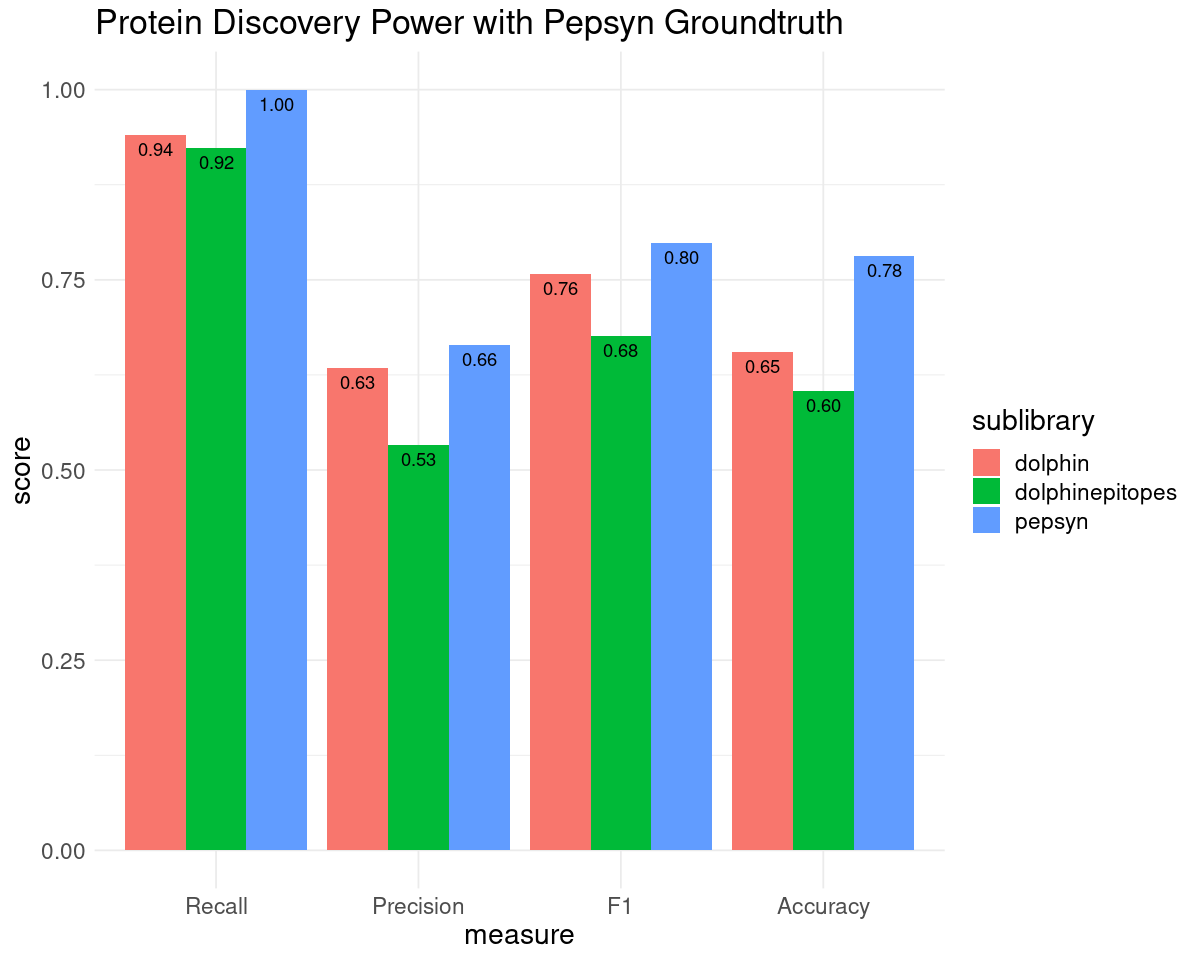

In [38]:
peps %>% subset(sublibrary=="pepsyn") %>% aggregate(reactive ~ pro_id, data = ., FUN = sum) %>% mutate(protein_grountruth = as.numeric(reactive > 1)) %>% select(-reactive) ->> pepsyn_protein_truth
peps %>% aggregate(reactive ~ pro_id + sublibrary, data = ., FUN = max) %>% merge(pepsyn_protein_truth, by = "pro_id") ->> protein_df

protein_df %>% subset(protein_grountruth == 1) %>% select(sublibrary, reactive) %>% 
table() %>% as.data.frame() %>% dcast(sublibrary ~ reactive, value.var = "Freq") %>% rename(FN="0",TP="1") %>%
mutate(Recall = TP/(TP+FN)) ->> recall_df

protein_df %>% subset(reactive == 1) %>% select(sublibrary, protein_grountruth) %>% 
table() %>% as.data.frame() %>% dcast(sublibrary ~ protein_grountruth, value.var = "Freq") %>% rename(FP="0",TP="1") %>%
mutate(Precision = TP/(TP+FP)) ->> prec_df

protein_df %>% subset(reactive == 0) %>% subset(protein_grountruth == 0)  %>% select(sublibrary) %>% 
table() %>% as.data.frame() %>% rename(sublibrary=".",TN="Freq") ->> tn_df

merge(recall_df,prec_df) %>% merge(tn_df) %>% 
mutate(F1=2*Precision*Recall/(Precision+Recall)) %>% 
mutate(Accuracy=(TP+TN)/(TP+FN+TN+FP)) ->> score_df

score_df %>% select(-TP,-FN,-TN,-FP) %>% 
melt(id.vars = "sublibrary", variable.name="measure", value.name="score") %>%
ggplot(aes(x=measure,y=score,fill = sublibrary)) + geom_bar(position="dodge",stat="identity") + 
geom_text(aes(label=paste0(sprintf("%1.2f", score))), vjust = 1.5, position=position_dodge(.9)) +
ggtitle("Protein Discovery Power with Pepsyn Groundtruth")

In [29]:
pepsInd = anno_pep[anno_pep$containsResSite==FALSE ,c("tile_id","pro_id","taxon_id","sublibrary")]
pepsInd = cbind(pepsInd, lhfc[rownames(pepsInd),] %>% select(contains("X194") | contains("X195")))
pepsInd %>% melt(id.vars = c("tile_id","pro_id","taxon_id","sublibrary"), value.name = "lhfc",variable.name = "sample") %>%
mutate(reactive = as.numeric(lhfc>0)) -> pepsInd
pepsInd = droplevels(pepsInd)

In [43]:
pepsInd %>% subset(sublibrary=="pepsyn") %>% aggregate(reactive ~ pro_id + sample, data = ., FUN = sum) %>% mutate(protein_grountruth = as.numeric(reactive > 1)) %>% select(-reactive) -> pepsyn_protein_truth
pepsInd %>% subset(sublibrary!="dolphinepitopes") %>% aggregate(reactive ~ pro_id + sample + sublibrary, data = ., FUN = max) %>% merge(pepsyn_protein_truth) -> protein_df
protein_df = droplevels(protein_df)

protein_df %>% subset(protein_grountruth == 1) %>% select(sublibrary, reactive) %>% 
table() %>% as.data.frame() %>% dcast(sublibrary ~ reactive, value.var = "Freq") %>% rename(FN="0",TP="1") %>%
mutate(Recall = TP/(TP+FN)) -> recall_df

protein_df %>% subset(reactive == 1) %>% select(sublibrary, protein_grountruth) %>% 
table() %>% as.data.frame() %>% dcast(sublibrary ~ protein_grountruth, value.var = "Freq") %>% rename(FP="0",TP="1") %>%
mutate(Precision = TP/(TP+FP)) -> prec_df

protein_df %>% subset(reactive == 0) %>% subset(protein_grountruth == 0)  %>% select(sublibrary) %>% 
table() %>% as.data.frame() %>% rename(sublibrary=".",TN="Freq") -> tn_df

merge(recall_df,prec_df) %>% merge(tn_df) %>% 
mutate(F1=2*Precision*Recall/(Precision+Recall)) %>% 
mutate(Accuracy=(TP+TN)/(TP+FN+TN+FP)) -> score_df

pdf("figures/Protein_discovery_Pepsyn_groundtruth_per_sample.pdf", height = 8, width = 10)
score_df %>% select(-TP,-FN,-TN,-FP) %>% 
melt(id.vars = "sublibrary", variable.name="measure", value.name="score") %>%
ggplot(aes(x=measure,y=score,fill = sublibrary)) + geom_bar(position="dodge",stat="identity") + 
geom_text(aes(label=paste0(sprintf("%1.2f", score))), vjust = 1.5, position=position_dodge(.9)) +
ggtitle("Protein discovery power with Pepsyn groundtruth per sample")
dev.off()

png 
  2

null device 
          1

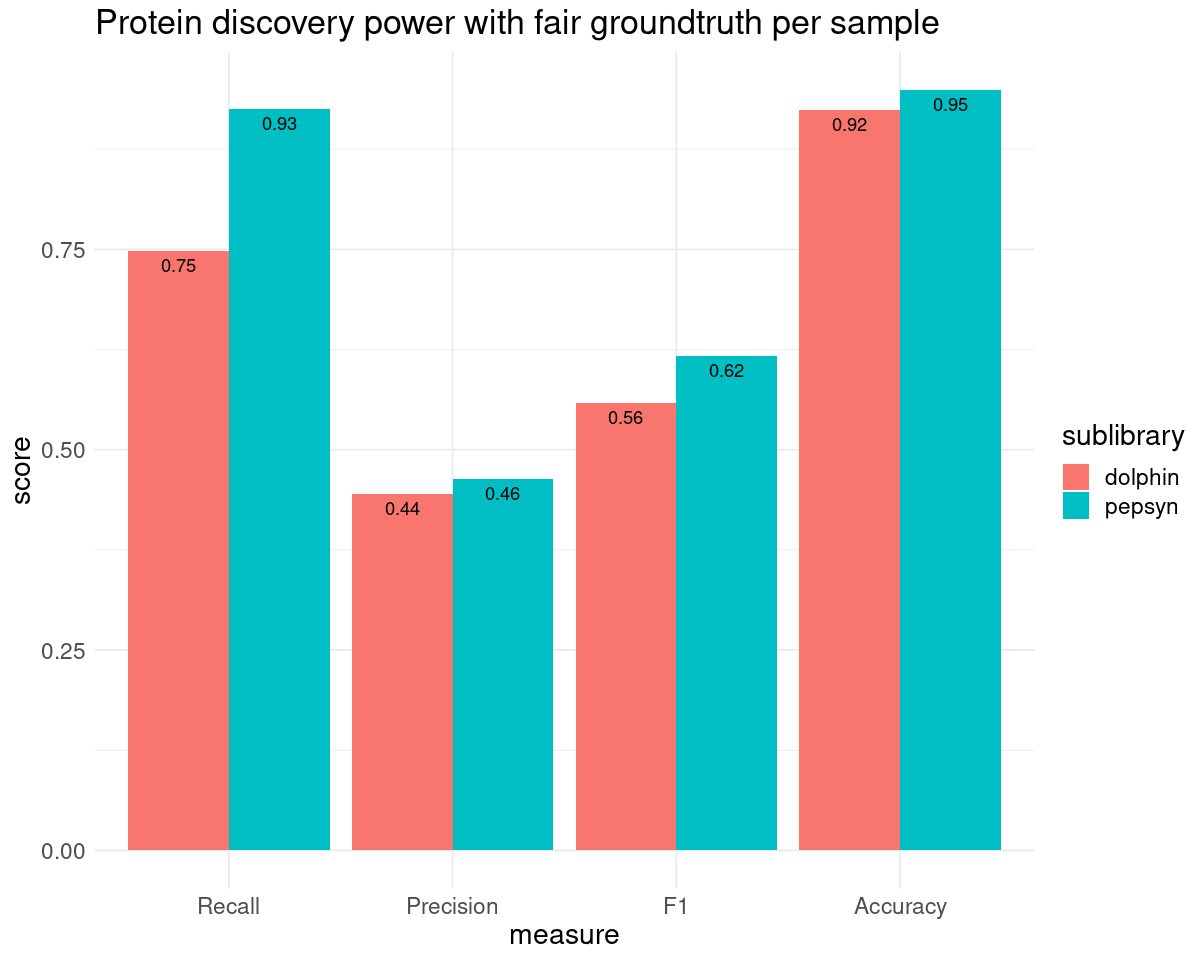

In [44]:
# note that this includes peptides that are not even present in the dolphyn library
pepsInd %>% subset(sublibrary!="dolphinepitopes") %>% aggregate(reactive ~ pro_id + sample, data = ., FUN = sum) %>% mutate(protein_grountruth = as.numeric(reactive > 1)) %>% select(-reactive) -> fair_protein_truth
pepsInd %>% subset(sublibrary!="dolphinepitopes") %>% aggregate(reactive ~ pro_id + sample + sublibrary, data = ., FUN = max) %>% merge(fair_protein_truth) -> protein_df
protein_df = droplevels(protein_df)

protein_df %>% subset(protein_grountruth == 1) %>% select(sublibrary, reactive) %>% 
table() %>% as.data.frame() %>% dcast(sublibrary ~ reactive, value.var = "Freq") %>% rename(FN="0",TP="1") %>%
mutate(Recall = TP/(TP+FN)) -> recall_df

protein_df %>% subset(reactive == 1) %>% select(sublibrary, protein_grountruth) %>% 
table() %>% as.data.frame() %>% dcast(sublibrary ~ protein_grountruth, value.var = "Freq") %>% rename(FP="0",TP="1") %>%
mutate(Precision = TP/(TP+FP)) -> prec_df

protein_df %>% subset(reactive == 0) %>% subset(protein_grountruth == 0)  %>% select(sublibrary) %>% 
table() %>% as.data.frame() %>% rename(sublibrary=".",TN="Freq") -> tn_df

merge(recall_df,prec_df) %>% merge(tn_df) %>% 
mutate(F1=2*Precision*Recall/(Precision+Recall)) %>% 
mutate(Accuracy=(TP+TN)/(TP+FN+TN+FP)) -> score_df


#pdf("figures/Protein_discovery_fair_groundtruth_per_sample.pdf", height = 8, width = 10)
score_df %>% select(-TP,-FN,-TN,-FP) %>% 
melt(id.vars = "sublibrary", variable.name="measure", value.name="score") %>%
ggplot(aes(x=measure,y=score,fill = sublibrary)) + geom_bar(position="dodge",stat="identity") + 
geom_text(aes(label=paste0(sprintf("%1.2f", score))), vjust = 1.5, position=position_dodge(.9)) +
ggtitle("Protein discovery power with fair groundtruth per sample")
dev.off()

In [13]:
# decluster proteins for accurate discovery power of phages!
anno_pep %>% select(pro_id,pro_id_all) %>% distinct() %>% 
    mutate(pro_id_all = gsub("[{} ]","",pro_id_all)) %>%
    mutate(pro_id_all = strsplit(pro_id_all,",")) ->> protein_clusters_map

p = protein_clusters_map$pro_id_all
names(p) <- protein_clusters_map$pro_id
protein_clusters = stack(p)

peps %>% merge(protein_clusters, by.x = 'pro_id', by.y = "ind", all = TRUE) %>% 
    rename(pro_id_representative = pro_id) %>% rename(pro_id = values) %>%
    select(-taxon_id) %>%  mutate(taxon_id = sub("_[^_]+$", "", pro_id)) ->> peps_decluster

In [14]:
peps_decluster

pro_id_representative,tile_id,sublibrary,reactive,pro_id,taxon_id
<fct>,<fct>,<fct>,<dbl>,<chr>,<chr>
ivig_1166_16,dolphinepitopes_5583706788368356968,dolphinepitopes,1,ivig_601_17,ivig_601
ivig_1166_16,dolphinepitopes_5583706788368356968,dolphinepitopes,1,ivig_2749_9,ivig_2749
ivig_1166_16,dolphinepitopes_5583706788368356968,dolphinepitopes,1,uvig_297199_130,uvig_297199
ivig_1166_16,dolphinepitopes_5583706788368356968,dolphinepitopes,1,uvig_409788_141,uvig_409788
ivig_1166_16,dolphinepitopes_5583706788368356968,dolphinepitopes,1,ivig_2154_12,ivig_2154
ivig_1166_16,dolphinepitopes_5583706788368356968,dolphinepitopes,1,ivig_3353_26,ivig_3353
ivig_1166_16,dolphinepitopes_5583706788368356968,dolphinepitopes,1,ivig_1166_16,ivig_1166
⋮,⋮,⋮,⋮,⋮,⋮
uvig_356259_128,NA,NA,NA,uvig_356259_128,uvig_356259


# Question
curve, based on pepsyn groundtruth, AA vs reactivity

In [41]:
rawanno = read.table("phageome_tiles_annotation_all.csv", sep=",", header = TRUE, row.names = 1, stringsAsFactors=FALSE)

rawanno %>% subset(library == "dolphinepitopes") %>% select(tile_id.1,allinfo,AA)  %>% 
mutate(RFproba = sub(".*_", "", allinfo)) %>% mutate(RFproba =  as.numeric(RFproba)) %>% 
mutate(AA = substr(AA,6,20)) %>%
select(-allinfo) %>% rename(tile_id = tile_id.1) %>% remove_rownames() %>% column_to_rownames("AA") %>% select(-tile_id) -> epitopeProbas

getProba = function(epi){
        return(epitopeProbas[epi,"RFproba"])
}

rawanno %>% subset(library == "dolphin") %>% select(AA,tile_id.1,allinfo) %>%
mutate(Epi1 = substr(AA,1,15)) %>%
mutate(Epi2 = substr(AA,21,35)) %>%
mutate(Epi3 = substr(AA,41,55)) %>% select(-allinfo,-AA) %>%
melt(id.vars = "tile_id.1", value.name = "AA", variable.name = "epitope") %>% mutate(epiProba = getProba(AA)) %>%
rename(tile_id = tile_id.1) %>%
group_by(tile_id) %>% summarise_at("epiProba",list(meanProba = mean, firstEpiProba = max)) %>% 
column_to_rownames("tile_id") -> dolphynProbas

rawanno %>% select(library,tile_id.1,allinfo) %>% subset(!library %in% c("validationDS","monkeyvir")) %>% rename(tile_id = tile_id.1) %>% 
mutate(RFproba = sub(".*_", "", allinfo)) %>% mutate(RFproba = case_when(library=="dolphinepitopes" ~ as.numeric(RFproba),
                         library=="dolphin" ~ dolphynProbas[tile_id,"firstEpiProba"],
                         library=="pepsyn" ~ 0.5)) %>% 
select(-allinfo, -library) -> tileProbas

Warning message in eval_tidy(pair$rhs, env = default_env):
“NAs introduced by coercion”


In [8]:
anno_pep %>% subset(containsResSite==FALSE) %>% select(tile_id,pro_id,sublibrary) %>% rownames_to_column("pepID") -> peps

merge(peps,lhfc %>% rownames_to_column("pepID")) %>% select(-contains("X196"), -contains("X197")) %>%
melt(id.vars = c("pepID","tile_id","pro_id","sublibrary"), value.name = "lhfc", variable.name = "sample") %>% 
mutate(reactive = as.numeric(lhfc >0)) %>%
mutate(samplePro = paste(pro_id,sample)) %>% select(-lhfc) -> sample_protein_bin

In [9]:
# which sample-protein pairs should be reactive according to pepsyn?
sample_protein_bin %>% subset(sublibrary == "pepsyn") %>% 
aggregate(reactive ~ samplePro, data = ., FUN = max) %>% 
subset(reactive > 0) %>% select(-reactive) -> pepsynGT

# which sample-protein pairs should be reactive according to all libraries?
sample_protein_bin %>% aggregate(reactive ~ samplePro, data = ., FUN = max) %>% 
subset(reactive > 0) %>% select(-reactive) -> fairGT

In [10]:
sample_protein_bin %>% aggregate(reactive ~ pepID, data = ., FUN = sum) -> reactive_samples_per_peptide

sample_protein_bin %>% subset(samplePro %in% pepsynGT$samplePro) %>%
aggregate(reactive ~ pepID, data = ., FUN = sum) -> pepsynGT_TP_per_peptide

sample_protein_bin %>% subset(samplePro %in% fairGT$samplePro) %>%
aggregate(reactive ~ pepID, data = ., FUN = sum) -> fairGT_TP_per_peptide

In [11]:
sample_protein_bin %>% merge(tileProbas) -> protein_sample_peptides_with_probas

In [12]:
merge(peps,pepsynGT_TP_per_peptide) %>% rename(hitGT = reactive) %>% 
merge(reactive_samples_per_peptide) %>% 
merge(tileProbas) %>% select(-pepID) 

tile_id,pro_id,sublibrary,hitGT,reactive,RFproba
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
dolphin_1001031390910937997,uvig_355478_29,dolphin,17,29,0.61
dolphin_1001974258484100911,uvig_355286_47,dolphin,4,13,0.55
dolphin_1003390492466174482,uvig_356033_28,dolphin,9,15,0.65
dolphin_1003749516374457615,uvig_428798_54,dolphin,5,7,0.57
dolphin_1003824161713026019,ivig_3679_56,dolphin,3,4,0.68
dolphin_1008272176708253006,uvig_356577_1,dolphin,6,16,0.69
dolphin_1008999031636493537,ivig_3875_5,dolphin,0,4,0.62
⋮,⋮,⋮,⋮,⋮,⋮
pepsyn_994728770394673095,uvig_211095_58,pepsyn,0,0,0.5


In [14]:
head(protein_sample_peptides_with_probas)

,tile_id,pepID,pro_id,sublibrary,sample,reactive,samplePro,RFproba
,<fct>,<chr>,<fct>,<fct>,<fct>,<dbl>,<chr>,<dbl>
1,dolphin_1001031390910937997,DolphynLa_001_ATGGGCCTCGAACTGGTTAAGATGTTGCTCGACGTGAAAACTAAAGGTGG,uvig_355478_29,dolphin,SMART242X194,0,uvig_355478_29 SMART242X194,0.61
2,dolphin_1001031390910937997,DolphynLa_001_ATGGGCCTCGAACTGGTTAAGATGTTGCTCGACGTGAAAACTAAAGGTGG,uvig_355478_29,dolphin,S3.0137.01X195,0,uvig_355478_29 S3.0137.01X195,0.61
3,dolphin_1001031390910937997,DolphynLa_001_ATGGGCCTCGAACTGGTTAAGATGTTGCTCGACGTGAAAACTAAAGGTGG,uvig_355478_29,dolphin,SO.0491.01X194,0,uvig_355478_29 SO.0491.01X194,0.61
4,dolphin_1001031390910937997,DolphynLa_001_ATGGGCCTCGAACTGGTTAAGATGTTGCTCGACGTGAAAACTAAAGGTGG,uvig_355478_29,dolphin,SMART104X194,0,uvig_355478_29 SMART104X194,0.61
5,dolphin_1001031390910937997,DolphynLa_001_ATGGGCCTCGAACTGGTTAAGATGTTGCTCGACGTGAAAACTAAAGGTGG,uvig_355478_29,dolphin,SMART088X194,1,uvig_355478_29 SMART088X194,0.61
6,dolphin_1001031390910937997,DolphynLa_001_ATGGGCCTCGAACTGGTTAAGATGTTGCTCGACGTGAAAACTAAAGGTGG,uvig_355478_29,dolphin,SMART269X195,1,uvig_355478_29 SMART269X195,0.61


In [16]:
protein_sample_peptides_with_probas %>%
subset(sublibrary != "dolphinepitopes") %>%
mutate(hitGT = ifelse((samplePro %in% pepsynGT$samplePro) & reactive,1,0)) %>% #mark discovered reactivity
sample_frac(1L) %>% arrange(desc(RFproba)) %>%
group_by(sublibrary) %>% mutate(peptides = row_number()) %>%
mutate(cum_detected = cumsum(hitGT)) %>% 
mutate(perAA = case_when(sublibrary=="dolphinepitopes" ~ peptides*15,
                         sublibrary=="dolphin" ~ peptides*45,
                         sublibrary=="pepsyn" ~ peptides*56)) %>%
#subset(perAA<190000) %>% #zoom
#subset(perAA<2500) %>% #zoom
ggplot(aes(x=perAA, y = cum_detected, color = sublibrary)) + geom_step(size=2) +
ggtitle("Accumulated Reactivity per new sample-protein pair member")

In [17]:
options(repr.plot.width=15, repr.plot.height=8)
set.seed(3)

merge(peps,reactive_samples_per_peptide) %>% # change here for all reactivities, pepsynGT and fairGT: cell above
subset(sublibrary != "dolphinepitopes") %>%
merge(tileProbas) %>%
sample_frac(1L) %>% arrange(desc(RFproba)) %>%
group_by(sublibrary) %>% mutate(peptides = row_number()) %>% 
mutate(cum_reactive_samples = cumsum(reactive)) %>% 
mutate(perAA = case_when(sublibrary=="dolphinepitopes" ~ peptides*15,
                         sublibrary=="dolphin" ~ peptides*45,
                         sublibrary=="pepsyn" ~ peptides*56)) -> temp


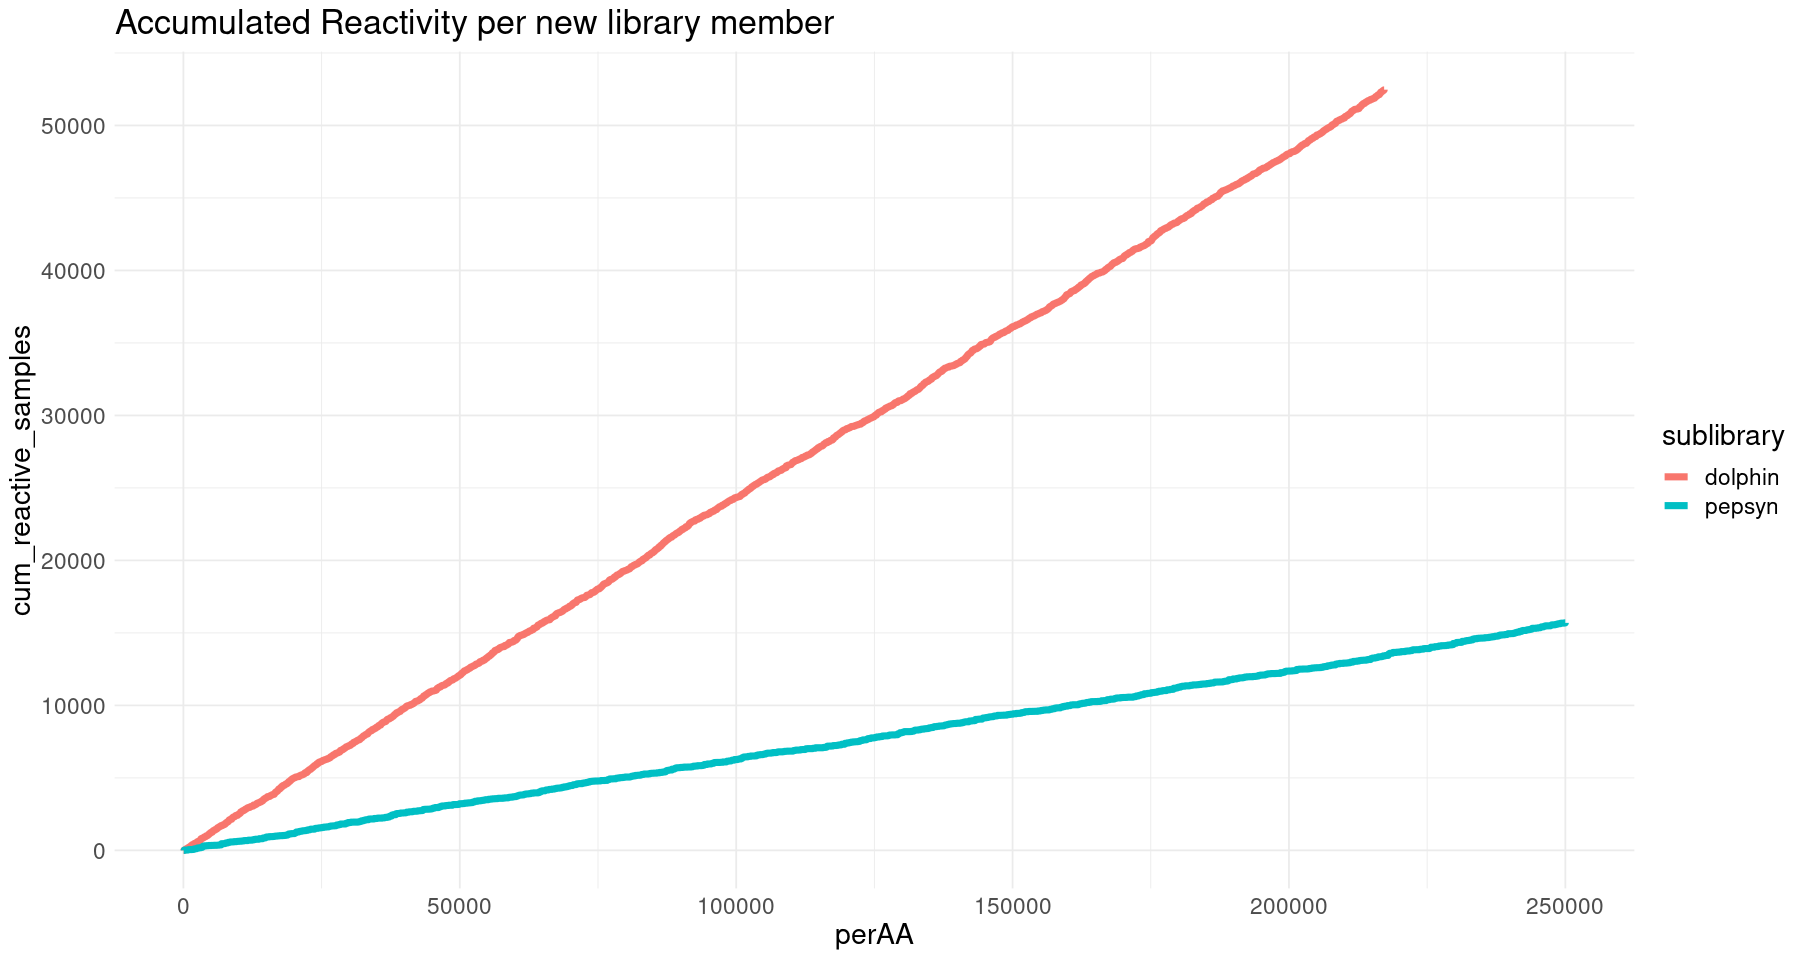

In [21]:
temp %>%
subset(perAA<250000) %>% #zoom
#subset(perAA<2000) %>% #zoom
ggplot(aes(x=perAA, y = cum_reactive_samples, color = sublibrary)) + geom_step(size=2) +
ggtitle("Accumulated Reactivity per new library member")

In [7]:
# new try

In [35]:
lhfc[rownames(peps),] %>% select(contains("X194") | contains("X195")) -> lhfc

In [42]:
merge(peps %>% select(tile_id,sublibrary) %>% rownames_to_column("pep_id"), tileProbas) %>% select(-tile_id) %>% column_to_rownames("pep_id") -> tileProbas2

In [63]:
merge(tileProbas2, lhfc, by='row.names') %>% column_to_rownames("Row.names") %>% 
rownames_to_column("rn") %>% mutate(rn = paste(rn, sublibrary, RFproba)) %>% column_to_rownames("rn") -> df1

In [66]:
df1 %>% arrange(sublibrary, desc(RFproba)) %>% subset(sublibrary == "dolphin") %>% select(-sublibrary, -RFproba) -> df_d
df1 %>% arrange(sublibrary, desc(RFproba)) %>% subset(sublibrary == "dolphinepitopes") %>% select(-sublibrary, -RFproba) -> df_de
df1 %>% arrange(sublibrary, desc(RFproba)) %>% subset(sublibrary == "pepsyn") %>% select(-sublibrary, -RFproba) -> df_p

In [131]:
df_d %>% mutate_all(function(x){m=which.max(x>0);ifelse(row_number()>=m,1,0)}) %>%
mutate(reactive_individuals = rowSums(.)) %>% mutate(order = row_number()) %>% mutate(library = "Dolphyn") -> df_d1

set.seed(1)
df_p %>% sample_frac(1L) %>% 
mutate_all(function(x){m=which.max(x>0);ifelse(row_number()>=m,1,0)}) %>%
mutate(reactive_individuals = rowSums(.)) %>%
mutate(order = row_number()) %>% mutate(library = "Pepsyn") -> df_p1

df_de %>% mutate_all(function(x){m=which.max(x>0);ifelse(row_number()>=m,1,0)}) %>%
mutate(reactive_individuals = rowSums(.)) %>% mutate(order = row_number()) %>% mutate(library = "Dolphynepitopes") -> df_de1

null device 
          1

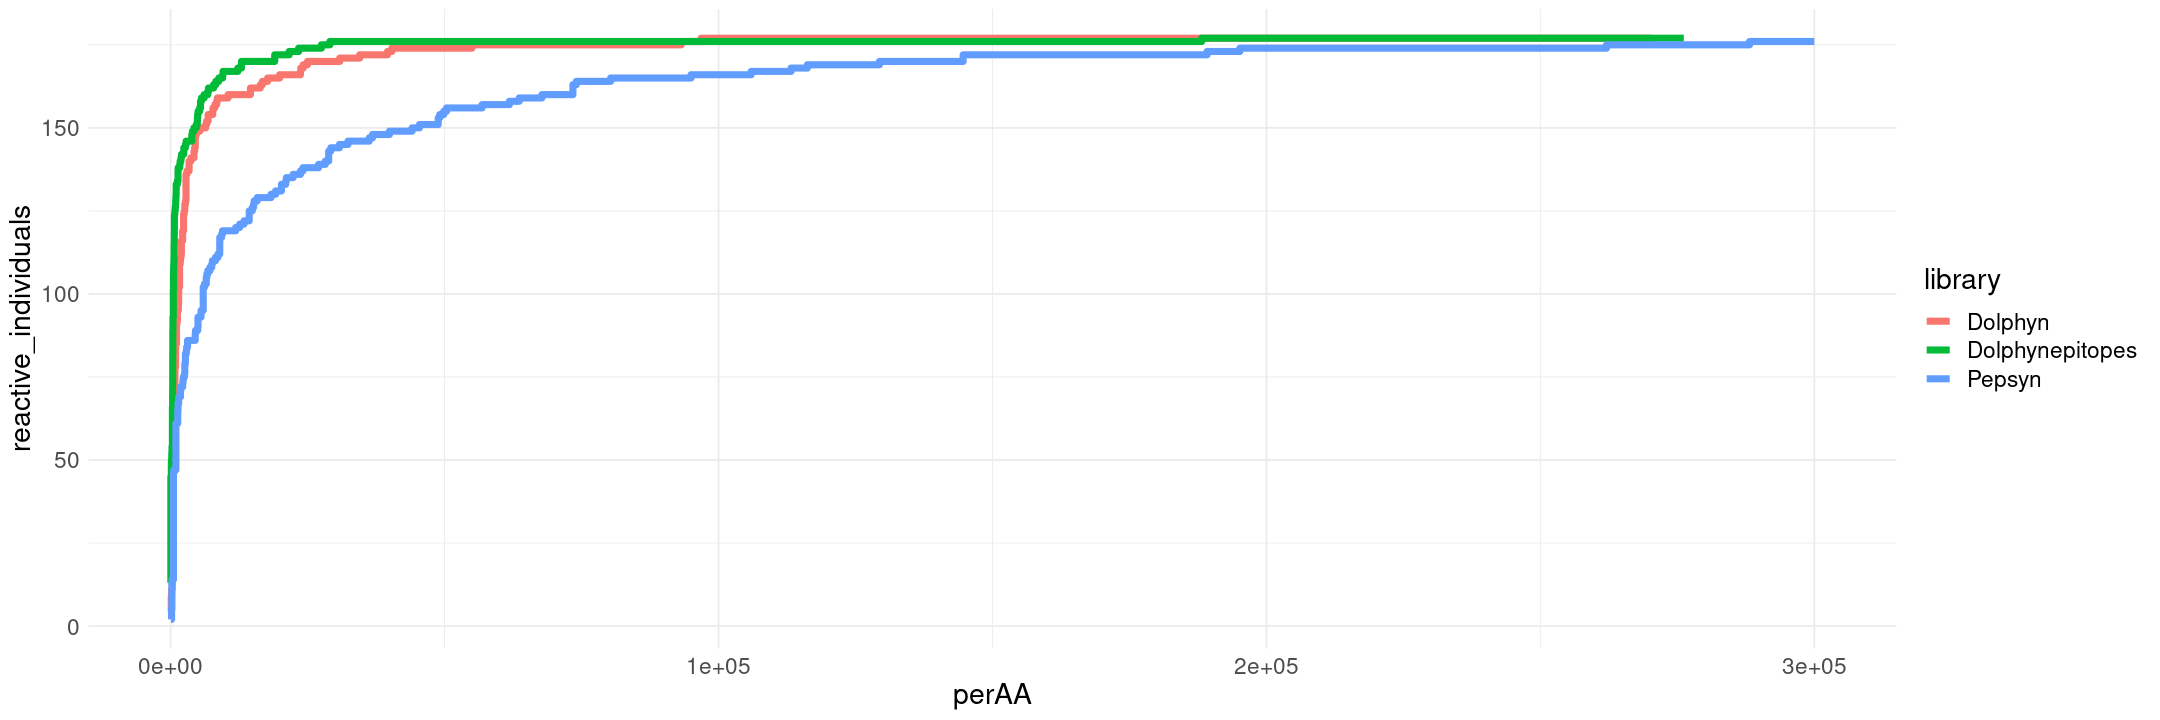

In [150]:
options(repr.plot.width=18, repr.plot.height=6)

#pdf("figures/bang_for_the_buck.pdf", height = 6, width = 18)

rbind(df_d1, df_de1, df_p1) %>% 
#rbind(df_d1, df_p1) %>% 
select("reactive_individuals","order","library") %>% 
mutate(perAA = case_when(library=="Dolphynepitopes" ~ order*15,
                         library=="Dolphyn" ~ order*56, #45
                         library=="Pepsyn" ~ order*56)) %>%
subset(perAA<300000) %>% #zoom
ggplot(aes(x=perAA, y = reactive_individuals, color = library)) + geom_step(size=2)

dev.off()

In [ ]:
ggplot(aes(x=perAA, y = reactive_individuals, color = ibrary)) + geom_step(size=2)